In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import  metrics

In [2]:
np.random.seed(15)
n_samples = 30
true_fun = lambda X: X**2 -2*X +3
X = np.random.choice(np.linspace(-1,4),n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.3
X = np.vstack(X)

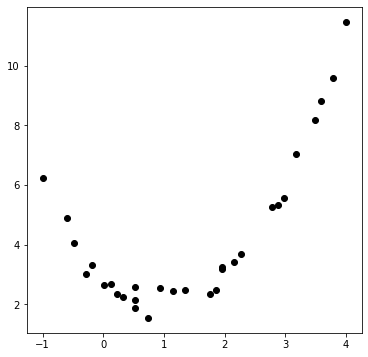

In [3]:
plt.figure(figsize=(6,6))
plt.scatter(X, y,  color='black')

# Teraz zastosujemy podział na dane trenujące i testowe

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=10)

Wytrenuj model regresji liniowej dla wielomianu 15 stopnia.

In [6]:
mdl15 = make_pipeline(PolynomialFeatures(15),LinearRegression())
mdl15.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=15, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Zwizualizuj wyniki otrzymywane przez model wraz z danymi trenującymi (oznacz kolorem czerwonym) i testowymi (oznacz kolorem zielonym).

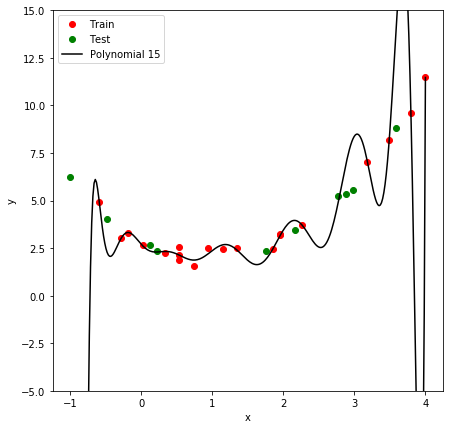

In [7]:
x_plot = np.vstack(np.linspace(min(X),max(X),300))
plt.figure(figsize=(7,7))
plt.plot(X_train,y_train,'ro')
plt.plot(X_test,y_test,'go')
plt.plot(x_plot,mdl15.predict(x_plot),'k')
plt.legend(['Train','Test', 'Polynomial 15'])
plt.ylim([-5,15])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Oblicz MSE dla danych trenujących i testujących

In [8]:
print('MSE train:')
print(metrics.mean_squared_error(y_true = y_train, y_pred = mdl15.predict(X_train)))
print('MSE test:')
print(metrics.mean_squared_error(y_true = y_test, y_pred = mdl15.predict(X_test)))

MSE train:
0.02753846836278397
MSE test:
88040.05872704758


In [34]:
mdl15[1].coef_

array([ 0.00000000e+00, -4.12194905e+00,  7.19094574e+00,  4.09932141e+01,
       -1.29100023e+02, -3.28280852e+01,  4.52526148e+02, -4.54982621e+02,
       -1.47110787e+02,  6.26085849e+02, -5.67492311e+02,  2.77255175e+02,
       -8.20643864e+01,  1.47451907e+01, -1.48471290e+00,  6.44252603e-02])

Uwtórz model dla wielomiany 15 stopnia z regularyzacją grzbietową

In [53]:
from sklearn.linear_model import Ridge
mdlR = make_pipeline(PolynomialFeatures(15), Ridge(0.18))
mdlR.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=15, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=0.18, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

Zwizualizuj wyniki otrzymywane przez model wraz z danymi trenującymi (oznacz kolorem czerwonym) i testowymi (oznacz kolorem zielonym).

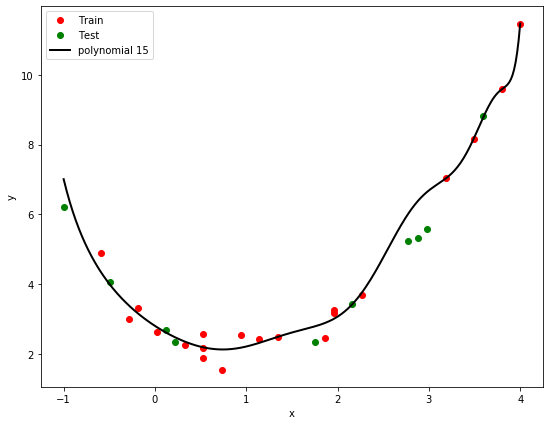

In [54]:
x_plot = np.vstack(np.linspace(min(X),max(X),300))
plt.figure(figsize=(9,7))
plt.plot(X_train,y_train,'ro')
plt.plot(X_test,y_test,'go')
plt.plot(x_plot,mdlR.predict(x_plot),'k',linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Train','Test', 'polynomial 15'])
plt.show()

Oblicz MSE dla danych trenujących i testujących

In [55]:
print('MSE train:')
print(metrics.mean_squared_error(y_true = y_train, y_pred = mdlR.predict(X_train)))
print('MSE test:')
print(metrics.mean_squared_error(y_true = y_test, y_pred = mdlR.predict(X_test)))

MSE train:
0.07450503922897088
MSE test:
0.3682887457370457


In [68]:
from sklearn.linear_model import Lasso
mdlL = make_pipeline(PolynomialFeatures(15), Lasso(0.00001))
mdlL.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=15, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lasso',
                 Lasso(alpha=1e-05, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [69]:
mdlL[1].coef_

array([ 0.00000000e+00, -1.94317471e+00,  1.14627377e+00, -6.60113930e-02,
        1.33609383e-02,  4.16445231e-04, -1.99338589e-04, -9.00245280e-05,
       -2.25088092e-05, -4.31172991e-06, -6.02210301e-07, -2.36780689e-08,
        2.39959646e-08,  1.25886280e-08,  4.53515195e-09,  1.41621641e-09])

Zwizualizuj wyniki otrzymywane przez model wraz z danymi trenującymi (oznacz kolorem czerwonym) i testowymi (oznacz kolorem zielonym).

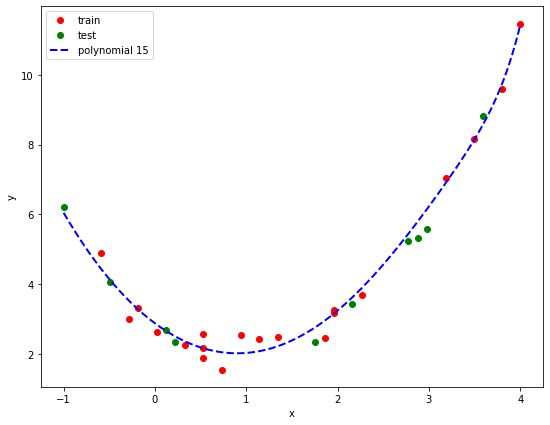

In [70]:
x_plot = np.vstack(np.linspace(min(X),max(X),300))
plt.figure(figsize=(9,7))
plt.plot(X_train,y_train,'ro')
plt.plot(X_test,y_test,'go')
plt.plot(x_plot,mdlL.predict(x_plot),'--b',linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['train','test', 'polynomial 15'])
plt.show()

Oblicz MSE dla danych trenujących i testujących

In [71]:
print('MSE train:')
print(metrics.mean_squared_error(y_true = y_train, y_pred = mdlL.predict(X_train)))
print('MSE test:')
print(metrics.mean_squared_error(y_true = y_test, y_pred = mdlL.predict(X_test)))

MSE train:
0.09056607227456179
MSE test:
0.09120745458559326


In [25]:
from sklearn.linear_model import ElasticNet
mdlEN = make_pipeline(PolynomialFeatures(15), ElasticNet(alpha=0.001,l1_ratio=0.7))
mdlEN.fit(X_train,y_train)

D:\Programy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9693193570971467, tolerance: 0.014710772705082299
  positive)


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=15, include_bias=True,
                                    interaction_only=False, order='C')),
                ('elasticnet',
                 ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True,
                            l1_ratio=0.7, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)

In [72]:
mdlEN[1].coef_

array([ 0.00000000e+00, -2.65595404e-01, -3.25838431e-03, -8.10824602e-02,
        6.63183651e-03, -1.66516150e-02,  1.67132868e-02,  9.33804161e-03,
        1.65817710e-02,  2.72310180e-03, -7.33153256e-03, -9.33109300e-03,
        1.06403815e-02, -3.92063917e-03,  6.41713477e-04, -3.98899612e-05])

Zwizualizuj wyniki otrzymywane przez model wraz z danymi trenującymi (oznacz kolorem czerwonym) i testowymi (oznacz kolorem zielonym).

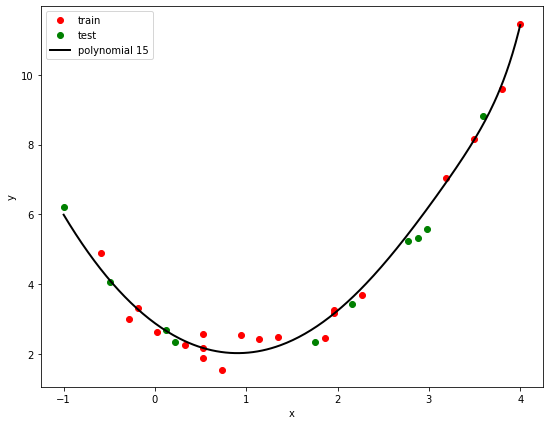

In [26]:
x_plot = np.vstack(np.linspace(min(X),max(X),300))
plt.figure(figsize=(9,7))
plt.plot(X_train,y_train,'ro')
plt.plot(X_test,y_test,'go')
plt.plot(x_plot,mdlEN.predict(x_plot),'k',linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['train','test', 'polynomial 15'])
plt.show()

Oblicz MSE dla danych trenujących i testujących

In [27]:
print('MSE train:')
print(metrics.mean_squared_error(y_true = y_train, y_pred = mdlEN.predict(X_train)))
print('MSE test:')
print(metrics.mean_squared_error(y_true = y_test, y_pred = mdlEN.predict(X_test)))

MSE train:
0.09108794176064364
MSE test:
0.09340182057583425


In [28]:
alphas = np.logspace(-10,3)
MSE_train = []
MSE_test = []
coefs = []
import warnings
warnings.filterwarnings("ignore")
for a in alphas:
    mdlR = make_pipeline(PolynomialFeatures(15), Ridge(alpha=a))
    mdlR.fit(X_train,y_train)
    coefs.append(mdlR[1].coef_)
    MSE_train.append(metrics.mean_squared_error(y_true = y_train, y_pred = mdlEN.predict(X_train)))
    MSE_test.append(metrics.mean_squared_error(y_true = y_test, y_pred = mdlEN.predict(X_test)))

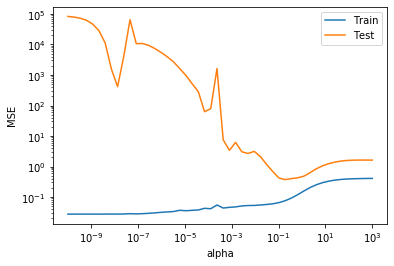

In [30]:
plt.loglog(alphas,MSE_train)
plt.loglog(alphas,MSE_test)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend(['Train','Test'])
plt.show()

In [249]:
min_value = min(MSE_test)
min_index = MSE_test.index(min_value)
print(alphas[min_index])
print(MSE_test[min_index])

0.19306977288832536
0.3729404025618848


In [31]:
alphas = np.logspace(-10,1)
coefs = []
import warnings
warnings.filterwarnings("ignore")
for a in alphas:
    mdlEN = make_pipeline(PolynomialFeatures(15), Ridge(alpha=a))
    mdlEN.fit(X_train,y_train)
    coefs.append(mdlEN[1].coef_)

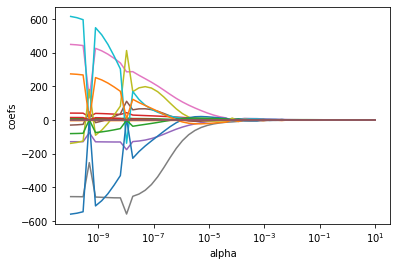

In [32]:
plt.semilogx(alphas,coefs)
plt.xlabel('alpha')
plt.ylabel('coefs')
plt.show()

In [33]:
np.stack(coefs)

array([[ 0.00000000e+00, -4.11262411e+00,  7.23134437e+00,
         4.07104919e+01, -1.29207523e+02, -3.04108742e+01,
         4.48644604e+02, -4.55426789e+02, -1.39048380e+02,
         6.14907600e+02, -5.59347792e+02,  2.73598149e+02,
        -8.10186313e+01,  1.45592213e+01, -1.46593694e+00,
         6.36023500e-02],
       [ 0.00000000e+00, -4.10650181e+00,  7.25776095e+00,
         4.05250608e+01, -1.29277168e+02, -2.88270887e+01,
         4.46098691e+02, -4.55714723e+02, -1.33765012e+02,
         6.07579038e+02, -5.54007029e+02,  2.71199732e+02,
        -8.03327183e+01,  1.44372347e+01, -1.45362012e+00,
         6.30625055e-02],
       [ 0.00000000e+00, -4.09656072e+00,  7.30046513e+00,
         4.02243049e+01, -1.29388603e+02, -2.62611501e+01,
         4.41969229e+02, -4.56175731e+02, -1.25203882e+02,
         5.95697938e+02, -5.45346536e+02,  2.67309919e+02,
        -7.92201702e+01,  1.42393569e+01, -1.43363944e+00,
         6.21867099e-02],
       [ 0.00000000e+00, -2.93687309e